In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('Main.csv')
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [3]:
df.shape

(35, 6)

In [6]:
## removing Area Name

group_data = df.drop('Area Name', axis=1)
group_data.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,3378518,385463,12541302,26.939133,3.073549
1,963742,267936,6864602,14.039299,3.903154
2,4886265,979525,27743338,17.612390,3.530667
3,175200,91276,1055450,16.599555,8.648065
4,1929236,525301,10086292,19.127307,5.208069


In [8]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Illiterate                   35 non-null     int64  
 1   Graduate & above             35 non-null     int64  
 2   Total - Population           35 non-null     int64  
 3   Percentage Illiterate        35 non-null     float64
 4   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.5 KB


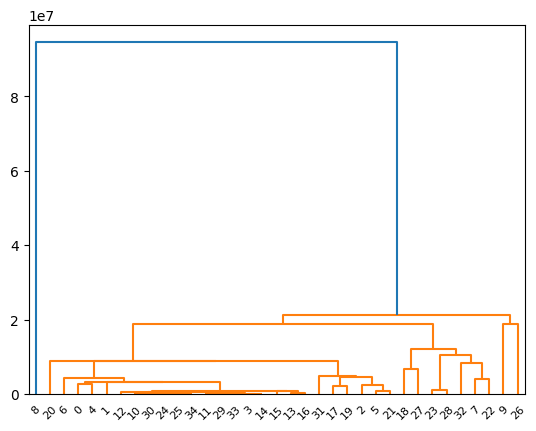

In [9]:
## Single linkage

linkage_single = linkage(group_data, method='single', metric='euclidean')
dendrogram(linkage_single)
plt.show()

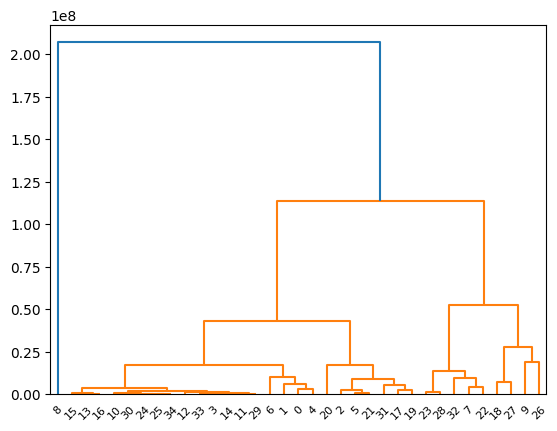

In [10]:
## Complete linkage

linkage_complete = linkage(group_data, method='complete', metric='euclidean')
dendrogram(linkage_complete)
plt.show()

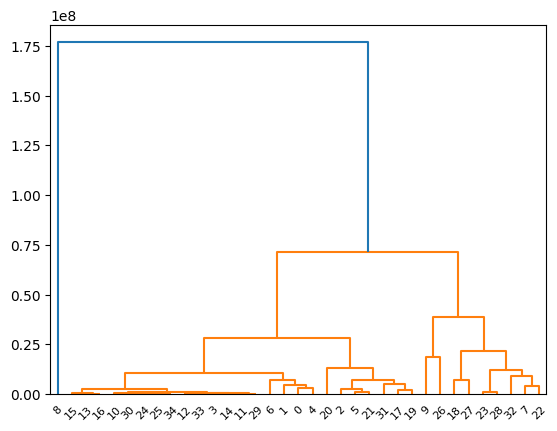

In [11]:
## average linkage

linkage_average = linkage(group_data, method='average', metric='euclidean')
dendrogram(linkage_average)
plt.show()

In [14]:
cut_tree(linkage_complete, n_clusters=3)

cluster_labels = cut_tree(linkage_complete, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [15]:
## assign cluster labels

group_data['cluster_labels'] = cluster_labels
group_data.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,cluster_labels
0,3378518,385463,12541302,26.939133,3.073549,0
1,963742,267936,6864602,14.039299,3.903154,0
2,4886265,979525,27743338,17.612390,3.530667,0
3,175200,91276,1055450,16.599555,8.648065,0
4,1929236,525301,10086292,19.127307,5.208069,0
